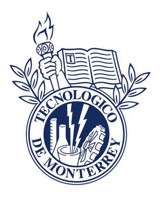

## Instituto Tecnológico y de Estudios Superiores de Monterrey

## Proyecto Integrador

## Dr. Luis Eduardo Falcón Morales

<table text-align="left">
  <tr>
    <th style="text-align:center;">Name</th>
    <th style="text-align:center;">Student ID</th>
  </tr>
  <tr>
    <td style="text-align:left;">Estefania Abigail Castro Belmont</td>
    <td style="text-align:left;">A01332636</td>
  </tr>
  <tr>
    <td style="text-align:left;">Roberto Carlos Avelar Sigüenza</td>
    <td style="text-align:left;">A01016798</td>
  </tr>
  <tr>
    <td style="text-align:left;">Nicolas Mojica Gómez</td>
    <td style="text-align:left;">A01794354</td>
  </tr>
</table>


Cuando desarrollamos modelos de aprendizaje automático, resulta simplista creer que el rendimiento por sí solo es suficiente. Aunque lograr un modelo con un desempeño sólido podría sugerir su integración en el entorno de producción para respaldar decisiones comerciales basadas en datos, esta percepción a menudo difiere de la realidad. En muchas ocasiones, es imperativo considerar otras inquietudes cruciales, como el tiempo necesario para el entrenamiento, los recursos requeridos y la complejidad inherente al modelo.

Además, estas preocupaciones adquieren una urgencia adicional cuando el modelo está destinado a utilizarse operativamente durante períodos prolongados, especialmente cuando se enfrenta a datos en tiempo real. La selección de modelos se convierte, por lo tanto, en un proceso crucial que implica la elección de un modelo final de entre varios candidatos generados por diversos algoritmos e hiperparámetros, todo ello en función de los criterios establecidos.

Es importante tener en cuenta que ciertos algoritmos demandan una preparación de datos especializada, lo que extiende el proceso de selección. La elección del modelo podría, por lo tanto, involucrar flujos distintos, es decir, cada uno podría tomar el mismo conjunto de datos de entrenamiento sin procesar y generar un modelo que pueda evaluarse de manera similar, pero que demande pasos computacionales diversos.

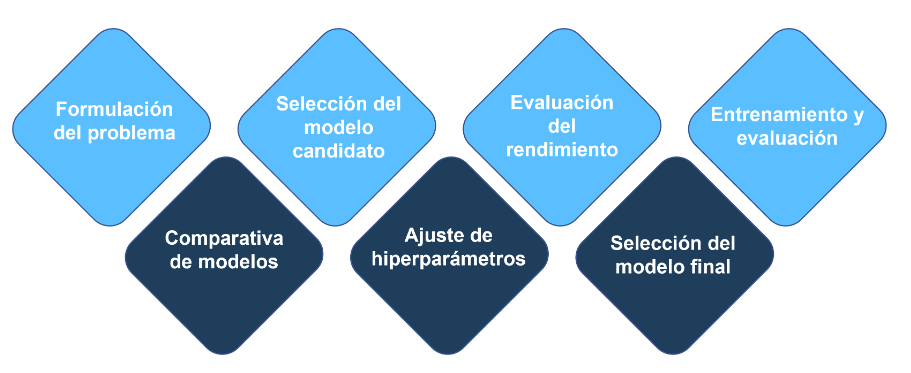

###**Algoritmos y métricas de desempeño**



La selección de las estrategias de modelado está intrínsecamente ligada a los objetivos comerciales, las características específicas de los datos y las condiciones limitantes del proyecto. En la fase de modelado, el propósito es desarrollar uno o varios modelos que cumplan con las restricciones y requisitos previamente definidos. Y en principio, para la evaluación del rendimiento de estos modelos se utilizan métricas de desempeño. Éstas son herramientas esenciales que permiten cuantificar y cualificar la capacidad predictiva de un modelo, proporcionando insights valiosos sobre su precisión, robustez y generalización.

Pero la estrategia de modelado no debe regirse exclusivamente por las métricas de desempeño. La metodología CRISP-ML, sugiere evaluar los modelos generados en medidas blandas como:

*   Solidez: La resiliencia del modelo ante entradas inconsistentes y fallos en el entorno de ejecución.
*   Explicabilidad: La explicabilidad directa o post-hoc del modelo.
*   Escalabilidad: La capacidad del modelo para escalar a un gran volumen de datos en el sistema de producción.
*   Demanda de recursos: La demanda de recursos del modelo para su implementación.
*   Complejidad del modelo: Nivel de sofisticación, estructura y capacidad del modelo para adaptarse a la complejidad de los datos.


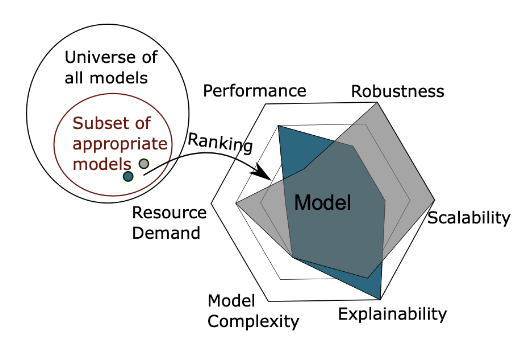

Nuestro proyecto se enfoca en utilizar modelos de Inteligencia Artificial (IA) para optimizar el proceso de contratación de talento humano eliminando cualquier sesgo de género en el proceso de selección. La implementación de estos modelos permitirá evaluar de manera objetiva las habilidades, competencias y experiencia de los candidatos, sin verse influenciados por factores de género.
Este proyecto representa una oportunidad para Oracle de liderar en la adopción de prácticas inclusivas y equitativas en el proceso de contratación, demostrando su compromiso con la diversidad y la excelencia en la selección del talento.

Considerando la base de datos donde tenemos las descripciones de los perfiles que se necesitan, se busca el mejor modelo de salida binaria (hombre vs mujer), donde la entrada es el descriptivo del perfil y la salida el género(hombre vs mujer),  para ello vamos a analizar los siguientes modelos:

a.	Modelos de machine learning. <br>
b.	Modelos de deep learning <br>
c.	Modelos LLM.



###**Selección del algoritmo**

**[Rúbrica]** *Se explica por qué el algoritmo seleccionado es apropiado para el tipo de problema que se está abordando. Se considera en el análisis aspectos clave, como el tipo (estructurados o no estructurados) y la cantidad de datos, la presencia de características relevantes, la interpretabilidad (si es importante), entre otros.*

En este paso lo que buscamos es que evalar algunos modelos de machine learning,  deep learning y LLM que puedan determinar el género del candidato considerando solamente el descriptivo.


##**Modelos de machine learning clásicos**:

**Clasificación de texto**: Random Forest puede aprender a clasificar el texto del "Descriptivo" en categorías de género (Femenino o Masculino).

**Explicar por qué el algoritmo seleccionado es apropiado para el tipo de problema que se está abordando.**

Random Forest es una elección apropiada para el problema de predecir el género del candidato basado en el campo "Descriptivo" debido a varias razones clave. En primer lugar, los datos textuales del campo "Descriptivo" son no estructurados, y una vez transformados en características estructuradas utilizando técnicas de procesamiento de lenguaje natural (NLP) como TF-IDF, Random Forest puede manejarlos eficazmente. Además, Random Forest es eficiente en términos de manejo de grandes conjuntos de datos funcionando bien con un número razonable de ejemplos y siendo menos propenso a sobreajustarse en comparación con otros modelos como los árboles de decisión individuales. Este modelo también es capaz de manejar datasets con un gran número de características y selecciona automáticamente las más relevantes, lo cual es crucial en la clasificación de texto donde el espacio de características puede ser muy grande. Aunque Random Forest no es tan interpretable como un árbol de decisión simple, proporciona cierta capacidad de interpretación mediante la obtención de medidas de importancia de características, indicando cuáles son las palabras más influyentes en la predicción. Por lo tanto, si bien la interpretabilidad detallada no es crítica, Random Forest ofrece un buen equilibrio entre rendimiento y explicabilidad. Finalmente, Random Forest es robusto frente a los datos ruidosos y tiene una excelente capacidad de generalización, lo que es particularmente útil para datos textuales que pueden variar en calidad y consistencia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import joblib
import matplotlib.pyplot as plt

In [6]:
# Cargamos el conjunto de datos en un DataFrame de pandas
data = pd.read_excel('/content/descriptivos oracle.xlsx')

**Preprocesamiento del texto:**
Antes de entrenar el modelo, necesitamos preprocesar el texto del campo "Descriptivo" para convertirlo en un formato que el algoritmo de aprendizaje automático pueda entender.



In [7]:
# Preprocesamiento del texto y vectorización
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Descriptivo'])
y = data['Género']

**División del conjunto de datos:** Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba para poder evaluar el rendimiento del modelo. En este caso utilizamos un 70-30 para dividir los datos.

In [8]:
# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Entrenamiento del modelo:** Implementamos Random Forest de la biblioteca de scikit-learn para entrenar el modelo.

In [9]:
# Entrenamiento del modelo
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Guardamos el modelo entrenado
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [11]:
# Hacemos la predicción y evaluación del modelo sin evaluación de características
y_pred = rf_classifier.predict(X_test)
print("Accuracy con características seleccionadas:", accuracy_score(y_test, y_pred))
print("\nClassification Report con características seleccionadas:")
print(classification_report(y_test, y_pred))

Accuracy con características seleccionadas: 0.9111111111111111

Classification Report con características seleccionadas:
              precision    recall  f1-score   support

    Femenino       0.88      0.96      0.92        46
   Masculino       0.95      0.86      0.90        44

    accuracy                           0.91        90
   macro avg       0.92      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90



 **Análisis de la relevancia de las características:**

**[Rúbrica]** *Se hace un análisis de la relevancia de las características, si aplica, utilizando métodos de selección (filter, embedded, wrapper) o extracción de características (PCA, FA, …) Se incluye una representación visual del resultado para facilitar la interpretación.*

 Después de entrenar el modelo original, se calcula la importancia de las características y se seleccionan las características más relevantes.

In [12]:
# Obtenemos la importancia de las características
importancias = rf_classifier.feature_importances_
caracteristicas = tfidf_vectorizer.get_feature_names_out()
importancia_df = pd.DataFrame({'caracteristica': caracteristicas, 'importancia': importancias})

In [13]:
# Ordenamos las características por importancia
importancia_df = importancia_df.sort_values(by='importancia', ascending=False)

In [14]:
# Mostramos las 20 características más importantes
print(importancia_df.head(20))

     caracteristica  importancia
2081             un     0.063184
2082            una     0.062990
1243           juan     0.038556
1248             la     0.030530
1290             lo     0.027618
1161      ingeniero     0.025622
390    comprometida     0.016708
729       dispuesto     0.016374
1340          maría     0.013310
20           activo     0.011859
397     comunicador     0.010023
728       dispuesta     0.009094
1160      ingeniera     0.008958
391    comprometido     0.008640
2100        valioso     0.008456
1570        persona     0.007455
971           falta     0.007186
946         experta     0.007066
1665      proactiva     0.007009
262       candidata     0.006341


In [15]:
# Filtramos las características menos importantes
umbral = 0.01  # Este umbral puede ajustarse
caracteristicas_seleccionadas = importancia_df[importancia_df['importancia'] > umbral]['caracteristica']

In [16]:
# Vectorizamos nuevamente utilizando solo las características seleccionadas
tfidf_vectorizer_seleccionado = TfidfVectorizer(vocabulary=caracteristicas_seleccionadas)
X_seleccionado = tfidf_vectorizer_seleccionado.fit_transform(data['Descriptivo'])

In [17]:
# División del conjunto de datos utilizando las características seleccionadas
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_seleccionado, y, test_size=0.3, random_state=42)

In [18]:
# Entrenamiento del modelo con características seleccionadas
rf_classifier_sel = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_sel.fit(X_train_sel, y_train_sel)

RandomForestClassifier(random_state=42)

In [19]:
# Predicción en el conjunto de prueba
y_pred = rf_classifier_sel.predict(X_test_sel)

**Evaluación del modelo:** Aquí proponemos utilizar la precisión, la exhaustividad y la puntuación F1 para evaluar el rendimiento del modelo en el conjunto de prueba. No estamos considerando otras métricas como el área bajo la curva ROC (AUC-ROC) porque las clases no están desbalanceadas.

In [20]:
# Predicción y evaluación con características seleccionadas
y_pred_sel = rf_classifier_sel.predict(X_test_sel)
rf_accuracy_sel = accuracy_score(y_test_sel, y_pred_sel)
print("Accuracy con características seleccionadas:", rf_accuracy_sel)
print("\nClassification Report con características seleccionadas:")
print(classification_report(y_test_sel, y_pred_sel))

Accuracy con características seleccionadas: 0.9444444444444444

Classification Report con características seleccionadas:
              precision    recall  f1-score   support

    Femenino       0.92      0.98      0.95        46
   Masculino       0.98      0.91      0.94        44

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90



**Justificación de las métricas:**

**[Rúbrica]** *La métrica elegida está alineada con los objetivos del problema, lo que permite una intepretación significativa en el contexto del negocio. Se pueden considerar en este análisis problemas específicos de los datos, como clases desbalanceadas.*

**Exactitud (Accuracy):** Es la proporción de predicciones correctas (verdaderos positivos y verdaderos negativos) sobre el total de instancias en los datos de prueba. En este caso, el modelo tiene una exactitud del 94%, lo que indica que el 94% de todas las predicciones realizadas por el modelo son correctas a diferencia del modelo sin el análisis de características que fue del 91%.

**Precisión (Precision):** Es la proporción de predicciones positivas correctas (verdaderos positivos) sobre todas las predicciones positivas realizadas por el modelo. En otras palabras, mide la calidad de las predicciones positivas del modelo. Para la clase Femenino, la precisión es del 92%, lo que indica que el 92% de las predicciones positivas para la clase Femenino fueron correctas. Para la clase Masculino, la precisión es del 98%, lo que indica que el 98% de las predicciones positivas para la clase Masculino fueron correctas.

**Exhaustividad (Recall):** Es la proporción de instancias positivas que fueron correctamente identificadas por el modelo (verdaderos positivos) sobre todas las instancias positivas en los datos de prueba. En otras palabras, mide la capacidad del modelo para identificar todas las instancias positivas de una clase. Para la clase Femenino, el recall es del 98%, lo que indica que el 98% de todas las instancias de la clase Femenino fueron correctamente identificadas por el modelo. Para la clase Masculino, el recall es del 91%, lo que indica que el 91% de todas las instancias de la clase Masculino fueron correctamente identificadas por el modelo.

**Puntuación F1 (F1-score):** Es la media armónica de precisión y recall. Proporciona una medida única que equilibra la precisión y el recall. Cuanto mayor sea la puntuación F1 mejor será el rendimiento del modelo. Para la clase Femenino la puntuación F1 es del 95%, y para la clase Masculino la puntuación F1 es del 94%.

**Support:** Es el número de instancias de cada clase en los datos de prueba.

El modelo tiene un buen rendimiento en general con altas precisiones, recalls y puntuaciones F1 para ambas clases (Femenino y Masculino). La exactitud del modelo es del 94%, lo que indica que es capaz de predecir correctamente el género del candidato en la mayoría de los casos.

In [21]:
# Recopilar el "Descriptivo" del usuario
descriptivo_usuario = input("Ingrese el Descriptivo del candidato: ")

Ingrese el Descriptivo del candidato: Pedro es un analista de datos con un desempeño deficiente en su trabajo. Se le puede describir como desorganizado, poco detallista y con dificultades para resolver problemas de manera eficiente. Su falta de proactividad y su tendencia a postergar tareas importantes lo llevan a no cumplir con los plazos establecidos, lo que afecta negativamente la productividad del equipo. Pedro carece de habilidades comunicativas efectivas, tanto en la elaboración de informes como en la presentación de resultados, lo que dificulta la transmisión de información clara y precisa. Además, su resistencia al cambio y su bajo nivel de adaptabilidad a nuevas tecnologías y metodologías de trabajo limitan su capacidad de crecimiento profesional. En resumen, Pedro se destaca por su falta de compromiso, su escasa iniciativa y su tendencia a conformarse con resultados mediocres.


In [22]:
# Preprocesar el texto del "Descriptivo" del usuario
descriptivo_usuario_vectorizado = tfidf_vectorizer_seleccionado.transform([descriptivo_usuario])

In [23]:
# Realizar la predicción
prediccion = rf_classifier_sel.predict(descriptivo_usuario_vectorizado)

In [24]:
# Mostrar el resultado de la predicción al usuario
if prediccion[0] == 'Femenino':
    print("El modelo predice que el género del candidato es: Femenino")
else:
    print("El modelo predice que el género del candidato es: Masculino")

El modelo predice que el género del candidato es: Masculino


**Sub / sobreajuste.**

**[Rúbrica]** *Se comparan diferentes métricas de evaluación del modelo en los conjuntos de entrenamiento y prueba para concluir si hay sub/sobreajuste. Se pueden utilizar curvas de aprendizaje, técnicas de validación cruzada o inspección de gráficos de residuos para complementar el análisis.*

**Curvas de Aprendizaje:**

Las curvas de aprendizaje son gráficos que muestran el rendimiento del modelo (en términos de una métrica, como precisión o error) tanto en el conjunto de entrenamiento como en el de prueba a medida que varía el tamaño del conjunto de entrenamiento.

Si las curvas de rendimiento del conjunto de entrenamiento y el de prueba convergen y tienen un rendimiento alto, el modelo está bien ajustado.

Si la curva de rendimiento del conjunto de entrenamiento es alta, pero la del conjunto de prueba es baja, hay sobreajuste.

Si ambas curvas están bajas y cercanas entre sí, hay subajuste.

In [25]:
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

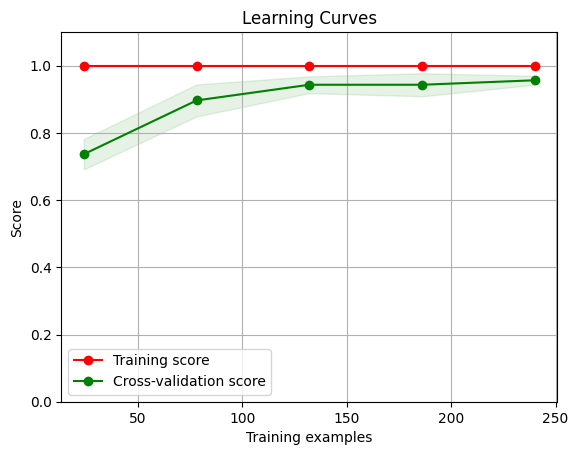

In [26]:
plot_learning_curve(rf_classifier_sel, X, y, cv=5)
plt.show()

Como las curvas de aprendizaje muestran que el rendimiento del entrenamiento y la validación son cercanos y altos el modelo está bien ajustado.

**Validación Cruzada:**

La validación cruzada es una técnica que divide el conjunto de datos en múltiples subconjuntos y entrena el modelo en algunos subconjuntos mientras se valida en otros.

La validación cruzada proporciona una estimación más robusta del rendimiento del modelo y puede ayudar a identificar sobreajuste si el rendimiento en el conjunto de entrenamiento es mucho mejor que el promedio de las validaciones cruzadas.

In [27]:
# Realizamos validación cruzada con 5 pliegues
cv_scores = cross_val_score(rf_classifier_sel, X, y, cv=5)

print("Cross-validation scores: ", cv_scores)
print("Mean CV score: ", np.mean(cv_scores))
print("Training score: ", rf_classifier_sel.score(X_train_sel, y_train_sel))
print("Test score: ", rf_classifier_sel.score(X_test_sel, y_test_sel))

Cross-validation scores:  [0.95       0.96666667 0.96666667 0.96666667 0.93333333]
Mean CV score:  0.9566666666666667
Training score:  1.0
Test score:  0.9444444444444444


Los puntajes de validación cruzada son bastante consistentes y altos, lo que indica que el modelo tiene un buen rendimiento general en diferentes subconjuntos de los datos.

La pequeña variación en los puntajes (0.93333333 a 0.96666667) sugiere que el modelo es estable y no muy sensible a la división específica de los datos.

Un **Mean CV score** de 0.956 indica que en promedio el modelo está prediciendo correctamente aproximadamente el 95.6% de las veces en los datos de validación.

Un **Training score** de 1.0 significa que el modelo está prediciendo correctamente el 100% de las veces en el conjunto de entrenamiento y esto es una señal de sobreajuste.

Un **Test score** de 0.9444 significa que el modelo está prediciendo correctamente aproximadamente el 94.44% de las veces en los datos de prueba.

Este puntaje es muy similar al promedio de validación cruzada (0.956), lo cual es una buena señal de que el modelo está generalizando bien a datos no vistos.

En general podemos conclujir que:

-Los puntajes de validación cruzada son consistentes y altos, lo que indica que el modelo es robusto y no demasiado dependiente de la partición específica de los datos.

-Posible sobreajuste: La discrepancia entre el puntaje de entrenamiento (1.0) y los puntajes de validación/test (~0.95) sugiere un posible sobreajuste. El modelo está memorizando los datos de entrenamiento pero sigue generalizando razonablemente bien en los datos de prueba.

-Buen rendimiento general: A pesar del potencial sobreajuste, el modelo sigue mostrando un buen rendimiento en el conjunto de prueba y en la validación cruzada, indicando que es un modelo útil para predecir en nuevos datos.

**Desempeño**

**[Rúbrica]** *Se establece un desempeño mínimo a obtener (histórico vs no existe) y se verifica si el modelo baseline que se propone alcanza un nivel aceptable.*

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [29]:
# Entrenar el modelo baseline
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Predecir con el modelo baseline
y_pred_baseline = baseline_model.predict(X_test)

In [31]:
# Evaluar el modelo baseline
print("Baseline Model Performance:")
print(classification_report(y_test, y_pred_baseline))
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Accuracy: ", baseline_accuracy)

Baseline Model Performance:
              precision    recall  f1-score   support

    Femenino       0.96      1.00      0.98        46
   Masculino       1.00      0.95      0.98        44

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90

Baseline Accuracy:  0.9777777777777777


**Comparamos desempeños**

In [32]:
# Comparar las precisiones
print("Baseline Accuracy: ", baseline_accuracy)
print("Random Forest Accuracy: ", rf_accuracy_sel)

if rf_accuracy_sel > baseline_accuracy:
    print("El modelo Random Forest supera al modelo baseline.")
else:
    print("El modelo Random Forest no supera al modelo baseline.")

Baseline Accuracy:  0.9777777777777777
Random Forest Accuracy:  0.9444444444444444
El modelo Random Forest no supera al modelo baseline.


**Hay que revisar este tema ya que si bien los modelos de regresión logística son un buen punto de partida por ser simples e interpretables, no capturan las relaciones complejas en los datos de texto.**

##**Modelos de deep learning**:

**Redes neuronales recurrentes:** Las RNN y variantes como Long Short-Term Memory (LSTM) son efectivas para modelar secuencias de texto. En este caso podemo entrenar una RNN para predecir el género del candidato basándose en el texto del "Descriptivo".

Para construir nuestro modelo basado en Redes Neuronales Recurrentes (RNN) para clasificar el género del candidato a partir del descriptivo utilizaremos la biblioteca Keras (parte de TensorFlow). Las RNN son adecuadas para este tipo de problemas porque pueden manejar secuencias de datos, como texto, y capturar dependencias temporales o contextuales.

Los pasos para Crear el Modelo son:

1.- Preprocesamiento del Texto <br>
2.- Creación del Modelo RNN <br>
3.- Entrenamiento del Modelo <br>
4.- Evaluación del Modelo

**Paso 1: Preprocesamiento del Texto**
Primero, convertiremos el texto en una representación numérica que pueda ser usada por el modelo RNN.

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [34]:
# Cargamos el conjunto de datos en un DataFrame de pandas
data = pd.read_excel('descriptivos oracle.xlsx')

In [35]:
# Convertimos las etiquetas de género a valores numéricos
data['Género'] = data['Género'].map({'Femenino': 0, 'Masculino': 1})

In [36]:
# Separamos las características (descriptivo) y la etiqueta (género)
X = data['Descriptivo']
y = data['Género']

In [37]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Tokenizamos el texto
tokenizer = Tokenizer(num_words=10000)  # Usar las 10000 palabras más frecuentes
tokenizer.fit_on_texts(X_train)

In [39]:
# Convertimos el texto a secuencias de enteros
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [40]:
# Rellenar las secuencias para que tengan la misma longitud
maxlen = 400  # Longitud máxima de las secuencias
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

In [41]:
# Convertimos las etiquetas a categorías
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

**Paso 2: Creación del Modelo RNN**

Usaremos una capa Embedding para convertir las palabras en vectores y una capa LSTM para capturar las dependencias en las secuencias.

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report

In [43]:
# Creamos el modelo
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))  # Capa de Embedding
model.add(LSTM(64, return_sequences=False))  # Capa LSTM
model.add(Dropout(0.5))  # Capa de Dropout para evitar el sobreajuste
model.add(Dense(2, activation='softmax'))  # Capa de salida para la clasificación binaria

In [44]:
# Compilamos el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Paso 3: Entrenamiento del Modelo**
Entrenamos el modelo con los datos de entrenamiento.

In [45]:
# Entrenar el modelo
history = model.fit(X_train_pad, y_train_cat, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
5/5 [==============================] - 6s 694ms/step - loss: 0.6961 - accuracy: 0.4150 - val_loss: 0.6942 - val_accuracy: 0.3968
Epoch 2/10
5/5 [==============================] - 2s 347ms/step - loss: 0.6871 - accuracy: 0.6531 - val_loss: 0.6906 - val_accuracy: 0.6032
Epoch 3/10
5/5 [==============================] - 1s 284ms/step - loss: 0.6786 - accuracy: 0.7415 - val_loss: 0.6864 - val_accuracy: 0.5873
Epoch 4/10
5/5 [==============================] - 1s 275ms/step - loss: 0.6642 - accuracy: 0.7347 - val_loss: 0.6728 - val_accuracy: 0.6190
Epoch 5/10
5/5 [==============================] - 1s 269ms/step - loss: 0.6186 - accuracy: 0.6871 - val_loss: 0.5763 - val_accuracy: 0.6349
Epoch 6/10
5/5 [==============================] - 1s 287ms/step - loss: 0.4615 - accuracy: 0.8299 - val_loss: 0.4954 - val_accuracy: 0.7778
Epoch 7/10
5/5 [==============================] - 1s 291ms/step - loss: 0.2901 - accuracy: 0.9388 - val_loss: 0.4143 - val_accuracy: 0.7937
Epoch 8/10
5/5 [====

**Paso 4: Evaluación del Modelo**
Evaluamos el modelo con los datos de prueba.

In [46]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_pad, y_test_cat)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

3/3 [==============================] - 0s 61ms/step - loss: 0.5645 - accuracy: 0.6778
Test Accuracy: 67.78%


In [47]:
# Hacemos predicciones
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

print(classification_report(y_test_classes, y_pred_classes, target_names=['Femenino', 'Masculino']))

3/3 [==============================] - 1s 51ms/step
              precision    recall  f1-score   support

    Femenino       0.61      1.00      0.76        46
   Masculino       1.00      0.34      0.51        44

    accuracy                           0.68        90
   macro avg       0.81      0.67      0.63        90
weighted avg       0.80      0.68      0.64        90



##**Modelos LLM**:


In [48]:
!pip install pandas scikit-learn transformers datasets matplotlib seaborn
!pip install accelerate
!pip install tensorflow scikit-learn pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 23.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 7.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-no

Precisión del modelo: 0.9666666666666667


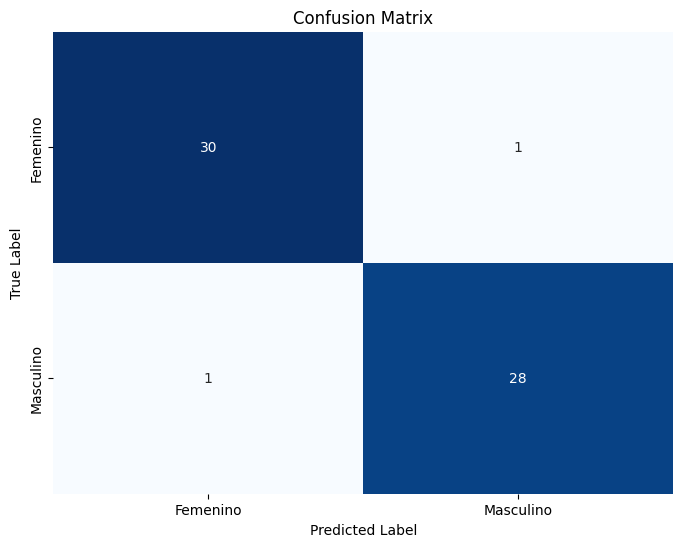

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel
data = pd.read_excel('/content/descriptivos oracle.xlsx')

# Preprocesamiento de datos
# Codificar variables categóricas
data_encoded = pd.get_dummies(data, columns=['Profesión', 'Desempeño'])

# Dividir los datos en características (X) y la variable objetivo (y)
X = data_encoded['Descriptivo']
y = data_encoded['Género']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizar el texto
vectorizer = TfidfVectorizer(max_features=1000)  # Limitar el número de características para evitar sobreajuste
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Construir y entrenar el modelo de redes neuronales
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
# Usamos una capa oculta con 100 neuronas, función de activación 'relu' y el solver 'adam'
model.fit(X_train_vectorized, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Graficar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Conclusión
Se explica por qué el algoritmo seleccionado es apropiado para el tipo de problema que se está abordando. Se considera en el análisis aspectos clave, como el tipo (estructurados o no estructurados) y la cantidad de datos, la presencia de características relevantes, la interpretabilidad (si es importante), entre otros.

- Consideramos que los tres algoritmos tienen sus ventajas y desventajas.
  Random Forest: Puede manejar datos con una alta dimensionalidad y puede identificar características importantes automáticamente, lo que es útil para identificar palabras o frases clave que distinguen descripciones femeninas de masculinas. Se pueden extraer las características importantes para entender qué palabras o frases están influyendo más en la clasificación. Este modelo es sencillo y eficiente para la problemática.
  MLPClassifier: Se puede hacer uso de la vectorización de Text mediante técnicas como TF-IDF o embeddings lo que el MLP puede procesar eficientemente. Se puede aplicar la reducción de Dimensionalidad para mejorar el rendimiento y reducir el ruido en los datos. Es altamente configurable y las funciones de activación pueden ser utilizadas para capturar diferentes tipos de relaciones en los datos.
  LSTM:  LSTM son particularmente adecuadas para datos secuenciales, como texto, donde el orden de las palabras es importante. Esto las hace ideales para la clasificación de descripciones que pueden tener dependencias complejas entre palabras.

Se hace un análisis de la relevancia de las características, si aplica, utilizando métodos de selección (filter, embedded, wrapper) o extracción de características (PCA, FA, …) Se incluye una representación visual del resultado para facilitar la interpretación.
- Se realizó una extracción de características importantes en el modelo random forest. Estas características nos pueden ayudar a tener una noción de cuáles son las palabras más importantes o incluso aquellas que están en tendencia y son más utilizadas para las descripciones.  

Se comparan diferentes métricas de evaluación del modelo en los conjuntos de entrenamiento y prueba para concluir si hay sub/sobreajuste. Se pueden utilizar curvas de aprendizaje, técnicas de validación cruzada o inspección de gráficos de residuos para complementar el análisis.

- Se utilizaron distintas métricas de evalucación en cada uno de los modelos. Llamó la atención que el MLPClassifier fue el que proporcionó las evaluaciones más bajas, mientas que la regresión logpisitca, el Random forest y la red enuronal LSTM dieron resultados aceptables. Al darnos cuenta de esto buscamos verificar que no hubiera un sobreajuste y al visualizar las curvas de aprendizaje logramos aseverar que esto no es así, por lo que asumimos que clasificar las descripciones por su género no es un trabajo difícil de realizar para los algoritmos propuestos.

La métrica elegida está alineada con los objetivos del problema, lo que permite una intepretación significativa en el contexto del negocio. Se pueden considerar en este análisis problemas específicos de los datos, como clases desbalanceadas.

- Debido a que se necesita entrenar a los modelos con distintas descripciones, consideramos que el punto más importante (para que el modelo sea fidedigno) es tener una gran cantidad de descripciones que puedan nutrir adecuadamente el modelo. Es por ello que consideramos que la curva de aprendizaje y el cross validation son las mejores métricas para evaluar los modelos (que podrían sobreajustarse con facilidad).

Se establece un desempeño mínimo a obtener (histórico vs no existe) y se verifica si el modelo baseline que se propone alcanza un nivel aceptable.

- Al notar que los modelos pueden clasificar adecuadamente las descripciones, se optó por tener un mínimo de 80% de precisión, pero se debe revisar la curva de aprendizaje para evitar el sobre entrenamiento